# Cohort analysis and prediction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import openpyxl
print('openpyxl version:',openpyxl.__version__)

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas import Timestamp

openpyxl version: 3.1.5


In [2]:
df = pd.read_excel(r'test_case_data_analyst.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_id       114200 non-null  object        
 1   quantity         114200 non-null  int64         
 2   is_trial_period  114200 non-null  bool          
 3   purchase_date    114200 non-null  datetime64[ns]
 4   user_id          114200 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ MB


In [4]:
df.isnull().sum()

product_id         0
quantity           0
is_trial_period    0
purchase_date      0
user_id            0
dtype: int64

In [5]:
df.head(10)

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-16,8803657
5,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,8800360
6,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,8827207
7,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9202595
8,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9029259
9,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,9456830


In [6]:
df[df['is_trial_period'] == True].count()

product_id         63008
quantity           63008
is_trial_period    63008
purchase_date      63008
user_id            63008
dtype: int64

In [7]:
df.user_id.nunique()

62909

In [8]:
first_order_df = df[df['is_trial_period'] == True].groupby('user_id').agg(first_purchase_date = ('purchase_date','min'))
first_order_df

,first_purchase_date
user_id,
404,2024-02-03
5337,2024-02-17
9010,2024-01-27
19880,2024-01-30
23403,2024-01-20
...,...
9694642,2024-02-20
9694662,2024-02-20
9694699,2024-02-20


In [9]:
first_order_df['cohort_month']=first_order_df['first_purchase_date'].dt.to_period('M')

In [10]:
df = df.merge(first_order_df, on = 'user_id')

In [11]:
df['days']=(df.purchase_date - df.first_purchase_date).dt.days
df

,product_id,quantity,is_trial_period,purchase_date,user_id,first_purchase_date,cohort_month,days
0,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-19,9484222,2024-02-12,2024-02,7
1,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9422402,2024-02-10,2024-02,7
2,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,4997991,2024-02-11,2024-02,7
3,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,9455582,2024-02-11,2024-02,7
4,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-16,8803657,2024-01-19,2024-01,28
...,...,...,...,...,...,...,...,...
114195,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8291100,2024-01-04,2024-01,0
114196,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-02,8236936,2024-01-02,2024-01,0
114197,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-03,8247910,2024-01-03,2024-01,0
114198,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8294146,2024-01-04,2024-01,0


In [12]:
quantity_amount = df.groupby('user_id').agg(quantity_amount=('quantity', 'sum')).reset_index()
df = df.merge(quantity_amount, on='user_id')
df

,product_id,quantity,is_trial_period,purchase_date,user_id,first_purchase_date,cohort_month,days,quantity_amount
0,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-19,9484222,2024-02-12,2024-02,7,2
1,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9422402,2024-02-10,2024-02,7,2
2,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,4997991,2024-02-11,2024-02,7,2
3,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,9455582,2024-02-11,2024-02,7,2
4,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-16,8803657,2024-01-19,2024-01,28,5
...,...,...,...,...,...,...,...,...,...
114195,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8291100,2024-01-04,2024-01,0,7
114196,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-02,8236936,2024-01-02,2024-01,0,1
114197,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-03,8247910,2024-01-03,2024-01,0,1
114198,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8294146,2024-01-04,2024-01,0,1


In [13]:
df['revenue'] = df['quantity_amount'] * 4.99
df

,product_id,quantity,is_trial_period,purchase_date,user_id,first_purchase_date,cohort_month,days,quantity_amount,revenue
0,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-19,9484222,2024-02-12,2024-02,7,2,9.98
1,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-17,9422402,2024-02-10,2024-02,7,2,9.98
2,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,4997991,2024-02-11,2024-02,7,2,9.98
3,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-18,9455582,2024-02-11,2024-02,7,2,9.98
4,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-16,8803657,2024-01-19,2024-01,28,5,24.95
...,...,...,...,...,...,...,...,...,...,...
114195,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8291100,2024-01-04,2024-01,0,7,34.93
114196,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-02,8236936,2024-01-02,2024-01,0,1,4.99
114197,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-03,8247910,2024-01-03,2024-01,0,1,4.99
114198,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8294146,2024-01-04,2024-01,0,1,4.99


Solution logic verification

In [14]:
df[df['user_id'] == 8291100].sort_values('purchase_date')

,product_id,quantity,is_trial_period,purchase_date,user_id,first_purchase_date,cohort_month,days,quantity_amount,revenue
114195,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-04,8291100,2024-01-04,2024-01,0,7,34.93
71604,1week_4.99_USD_subscription_7days_trial,1,False,2024-01-11,8291100,2024-01-04,2024-01,7,7,34.93
21683,1week_4.99_USD_subscription_7days_trial,1,False,2024-01-18,8291100,2024-01-04,2024-01,14,7,34.93
86819,1week_4.99_USD_subscription_7days_trial,1,False,2024-01-25,8291100,2024-01-04,2024-01,21,7,34.93
4384,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-01,8291100,2024-01-04,2024-01,28,7,34.93
81124,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-08,8291100,2024-01-04,2024-01,35,7,34.93
52663,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-15,8291100,2024-01-04,2024-01,42,7,34.93


In [15]:
cohort_revenue = df.groupby(['cohort_month', 'user_id']).agg(total_revenue=('revenue', 'max'))
final_cohort_revenue = cohort_revenue.groupby('cohort_month').agg(total_cohort_revenue=('total_revenue', 'sum')).reset_index()
final_cohort_revenue

,cohort_month,total_cohort_revenue
0,2024-01,415083.17
1,2024-02,154774.83


In [16]:
total_cohort_users = df.groupby('cohort_month')['user_id'].nunique().reset_index(name='total_users')
total_cohort_users

,cohort_month,total_users
0,2024-01,38494
1,2024-02,24415


In [17]:
total_cohort_users['total_users'].sum()

62909

LTV = Revenue / Number of clients

In [18]:
final_cohort_revenue = final_cohort_revenue.merge(total_cohort_users, on = 'cohort_month')

In [19]:
final_cohort_revenue.columns

Index(['cohort_month', 'total_cohort_revenue', 'total_users'], dtype='object')

In [20]:
final_cohort_revenue['LTV'] = final_cohort_revenue['total_cohort_revenue']/final_cohort_revenue['total_users']
final_cohort_revenue['LTV'] = final_cohort_revenue['LTV'].round(2)
final_cohort_revenue

,cohort_month,total_cohort_revenue,total_users,LTV
0,2024-01,415083.17,38494,10.78
1,2024-02,154774.83,24415,6.34


FYI, LTV above is based on revenue considering a trial period as a purchase

### Prediction

Introducing cumulative revenue for calculating cumulative LTV

In [21]:
# Sort the DataFrame by user_id and purchase_date so that cumulative sums are calculated in order
df['payment'] = np.where(df['is_trial_period'], 0, 4.99)
df = df.sort_values(['purchase_date'])

# Create the cumulative_revenue column for each user
df['cumulative_revenue'] = df.groupby('user_id')['payment'].cumsum()


In [22]:
df

,product_id,quantity,is_trial_period,purchase_date,user_id,first_purchase_date,cohort_month,days,quantity_amount,revenue,payment,cumulative_revenue
102315,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-01,8190554,2024-01-01,2024-01,0,3,14.97,0.00,0.00
99730,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-01,8186961,2024-01-01,2024-01,0,8,39.92,0.00,0.00
99720,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-01,8169617,2024-01-01,2024-01,0,1,4.99,0.00,0.00
112712,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-01,8205643,2024-01-01,2024-01,0,1,4.99,0.00,0.00
111387,1week_4.99_USD_subscription_7days_trial,1,True,2024-01-01,8198989,2024-01-01,2024-01,0,1,4.99,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
81131,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-20,8703641,2024-01-16,2024-01,35,6,29.94,4.99,24.95
80970,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-20,8212528,2024-01-02,2024-01,49,8,39.92,4.99,34.93
80963,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-20,9505660,2024-02-13,2024-02,7,2,9.98,4.99,4.99
29665,1week_4.99_USD_subscription_7days_trial,1,False,2024-02-20,7384318,2024-01-23,2024-01,28,5,24.95,4.99,19.96


In [23]:
time_array = []
coh_1_key, coh_2_key = df['cohort_month'].unique()[0], df['cohort_month'].unique()[1]
ltv = {
    coh_1_key: [],
    coh_2_key: [] 
}
for date_time in df.sort_values(['purchase_date'])['purchase_date'].unique():
    time_array.append(date_time)
    sub_df = df[df['purchase_date'] == date_time]
    sub_cohort_revenue = sub_df.groupby(['cohort_month', 'user_id']).agg(total_revenue=('cumulative_revenue', 'max'))
    sub_final_cohort_revenue = sub_cohort_revenue.groupby('cohort_month').agg(total_cohort_revenue=('total_revenue', 'sum')).reset_index()
    sub_total_cohort_users = sub_df.groupby('cohort_month')['user_id'].nunique().reset_index(name='total_users')
    sub_final_cohort_revenue['LTV'] = sub_final_cohort_revenue['total_cohort_revenue']/sub_total_cohort_users['total_users']

    for ck in ltv.keys():
        _ltv = sub_final_cohort_revenue[sub_final_cohort_revenue['cohort_month']==ck]['LTV'].values
        if len(_ltv)==0:
            ltv[ck].append(0)
        else:
            ltv[ck].append(_ltv[0])



(array([19723., 19730., 19737., 19744., 19754., 19761., 19768., 19775.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19744.0, 0, '2024-01-22'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19761.0, 0, '2024-02-08'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19775.0, 0, '2024-02-22')])

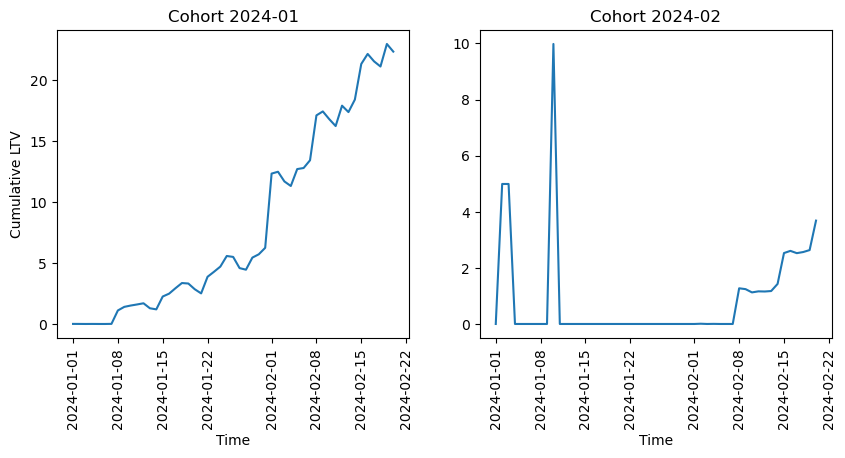

In [24]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
plt.title('Cohort '+str(coh_1_key))
ax1.plot(time_array,ltv[coh_1_key])
ax1.set_xlabel('Time')
ax1.set_ylabel('Cumulative LTV')
plt.xticks(rotation=90)

ax2 = plt.subplot(122)
plt.title('Cohort '+str(coh_2_key))
ax2.plot(time_array,ltv[coh_2_key])
ax2.set_xlabel('Time')
plt.xticks(rotation=90)


Second cohort has a few outliers

In [25]:
X = np.array([xx.value for xx in time_array]).reshape(-1,1)
y = ltv[coh_1_key]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, shuffle=False)

regressor = LinearRegression().fit(X_train, y_train)

In [26]:
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 21.60
Coefficient of determination: -3.15


Convert X values back into the `Timestamp` format

In [27]:
tt_train = np.array([Timestamp(xx) for xx in X_train[:,0]])
tt_test = np.array([Timestamp(xx) for xx in X_test[:,0]])

In [28]:
y_pred_train = regressor.predict(X_train)

 Extrapolating into the future

In [29]:
X_to_future = np.array(X_test.tolist()+[[1710134400000000000]])
tt_to_future = np.array([Timestamp(xx) for xx in X_to_future[:,0]])
y_to_future = regressor.predict(X_to_future)

Plotting

(array([19723., 19737., 19754., 19768., 19783.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19783.0, 0, '2024-03-01')])

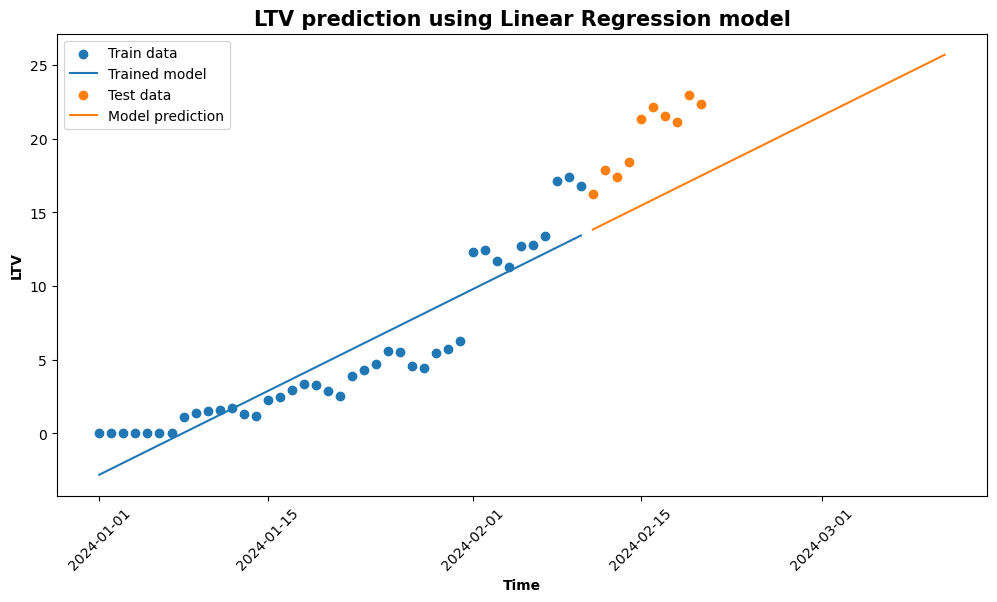

In [31]:
plt.figure(figsize=(12,6))

plt.scatter(tt_train, y_train, label='Train data')
plt.plot(tt_train, y_pred_train, label='Trained model')
plt.scatter(tt_test, y_test, label='Test data')
#plt.plot(tt_test, y_pred, label='Model prediction')
plt.plot(tt_to_future, y_to_future, label='Model prediction')
plt.title('LTV prediction using Linear Regression model', fontsize = 15, fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('LTV', fontweight='bold')
plt.legend()
plt.xticks(rotation=45)